# **Predict Customer Clicked Ads Classification by Using Machine Learning**

---

## Background
A company wants to invest a large budget in an online advertising campaign; however, the click-through rate (CTR) is still low, at only about **50%**. This low CTR indicates that most ad impressions do not capture customers' attention. Therefore, a data-driven approach using machine learning is needed to understand the characteristics of customers who are likely to click on ads. With these insights, the company can develop targeted strategies to significantly improve the CTR.

---

## Problems
The absence of a predictive system capable of identifying customers who are more likely to click on ads leads to suboptimal allocation of the advertising budget. This also reduces the effectiveness of campaigns, as ads are often shown to a less relevant audience. Additionally, the lack of insights into the features that influence ad clicks makes it difficult for the company to design more effective marketing strategies.

---

## Goals
This project aims to build a machine learning-based classification model that can predict the likelihood of customers clicking on ads based on behavioral and demographic data, such as time spent on the site, daily internet usage, and income. With this model, the company can improve the click-through rate (CTR) through more precise targeting strategies.

---
## Objective
1. Define the problem, goal, objectives, model, and metrics.
2. Import the necessary data and libraries.
3. Perform exploratory data analysis (EDA) to find valuable insights.
4. Conduct data preprocessing, such as handling null values, outliers, and more.
5. Build models using various classification techniques.
6. Determine the best model based on evaluation metrics.
7. Make recommendations based on the findings from modeling and EDA.

---  
## Dataset

This Dataset has 1000 columns and 11 columns.

| **Column Name**           | **Description**                                                        |
|----------------------------|------------------------------------------------------------------------|
| **Unnamed: 0**            | ID of Customers                                                       |
| **Daily Time Spent on Site** | Time spent by the user on a site in minutes                          |
| **Age**                   | Customer’s age in terms of years                                      |
| **Area Income**           | Average income of geographical area of consumer                      |
| **Daily Internet Usage**  | Average minutes in a day consumer is on the internet                 |
| **Male**                  | Gender of the customer                                               |
| **Timestamp**             | Time at which user clicked on an Ad or the closed window             |
| **Clicked on Ad**         | Whether or not the customer clicked on an Ad (Target Variable)       |
| **City**                  | City of the consumer                                                 |
| **Province**              | Province of the consumer                                             |
| **Category**              | Category of the advertisement                             

---
## Metrics
1. Click Through Rate (CTR)
2. Accuracy dan ROC-AUC score.

---
## Tools
1. Python Programming Language
2. Jupyterlab

# 0. Import Dataset

In [1]:
# import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from statistics import mode
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

In [17]:
# Load Data From Github
url = 'https://raw.githubusercontent.com/Yogaaprila/Predict-Customer-Clicked-Ads-Classification-by-Using-Machine-Learning/main/Clicked%20Ads%20Dataset.csv'
df = pd.read_csv(url)
pd.set_option('display.max_columns',None)

df.head()

In [5]:
# information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  987 non-null    float64
 2   Age                       1000 non-null   int64  
 3   Area Income               987 non-null    float64
 4   Daily Internet Usage      989 non-null    float64
 5   Male                      997 non-null    object 
 6   Timestamp                 1000 non-null   object 
 7   Clicked on Ad             1000 non-null   object 
 8   city                      1000 non-null   object 
 9   province                  1000 non-null   object 
 10  category                  1000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB


In [7]:
# rename some columns
df.rename(columns={'Male':'gender','Timestamp':'date'},inplace=True)

# Convert column to lowercase
df.columns = df.columns.str.lower()

# convert 'date' column datatype to datetime
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y %H:%M')

# drop 'unnamed: 0' columns
df = df.drop(columns=['unnamed: 0'],axis=1)

# replace yes to 1 and no to 1 in clicked on ads columns
df['clicked on ad'] = df['clicked on ad'].replace({'Yes' : 1, 'No':0})

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   daily time spent on site  987 non-null    float64       
 1   age                       1000 non-null   int64         
 2   area income               987 non-null    float64       
 3   daily internet usage      989 non-null    float64       
 4   gender                    997 non-null    object        
 5   date                      1000 non-null   datetime64[ns]
 6   clicked on ad             1000 non-null   int64         
 7   city                      1000 non-null   object        
 8   province                  1000 non-null   object        
 9   category                  1000 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 78.3+ KB


In [11]:
df.head()

,daily time spent on site,age,area income,daily internet usage,gender,date,clicked on ad,city,province,category
0,68.95,35,432837300.0,256.09,Perempuan,2016-03-27 00:53:00,0,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,80.23,31,479092950.0,193.77,Laki-Laki,2016-04-04 01:39:00,0,Denpasar,Bali,Food
2,69.47,26,418501580.0,236.50,Perempuan,2016-03-13 20:35:00,0,Surabaya,Jawa Timur,Electronic
3,74.15,29,383643260.0,245.89,Laki-Laki,2016-01-10 02:31:00,0,Batam,Kepulauan Riau,House
4,68.37,35,517229930.0,225.58,Perempuan,2016-06-03 03:36:00,0,Medan,Sumatra Utara,Finance


# 1. Exploratory Data Analysis (EDA)

## 1.1 Summary of Statistics

In [101]:
df_eda = df.copy()

In [31]:
# summarical statistic
numerical = df_eda.select_dtypes(include=['float64','int64']).columns

categorical = df_eda.select_dtypes(include=['object']).columns

time =  df_eda.select_dtypes(include=['datetime64']).columns

In [33]:
df_eda[numerical].describe().T

,count,mean,std,min,25%,50%,75%,max
daily time spent on site,987.0,6.492952e+01,1.584470e+01,32.60,5.127000e+01,6.811000e+01,7.846000e+01,9.143000e+01
age,1000.0,3.600900e+01,8.785562e+00,19.00,2.900000e+01,3.500000e+01,4.200000e+01,6.100000e+01
area income,987.0,3.848647e+08,9.407999e+07,97975500.00,3.286330e+08,3.990683e+08,4.583554e+08,5.563936e+08
daily internet usage,989.0,1.798636e+02,4.387014e+01,104.78,1.387100e+02,1.826500e+02,2.187900e+02,2.670100e+02
clicked on ad,1000.0,5.000000e-01,5.002502e-01,0.00,0.000000e+00,5.000000e-01,1.000000e+00,1.000000e+00


In [35]:
df_eda[categorical].describe().T

,count,unique,top,freq
gender,997,2,Perempuan,518
city,1000,30,Surabaya,64
province,1000,16,Daerah Khusus Ibukota Jakarta,253
category,1000,10,Otomotif,112


In [37]:
df_eda[time].describe().T

,count,mean,min,25%,50%,75%,max
date,1000,2016-04-10 10:33:36.840000,2016-01-01 02:52:00,2016-02-18 02:55:15,2016-04-07 17:27:00,2016-05-31 03:18:00,2016-07-24 00:22:00


## 1.2 Univariate Analysis

### 1.2.1 Boxplot of Numerical Features

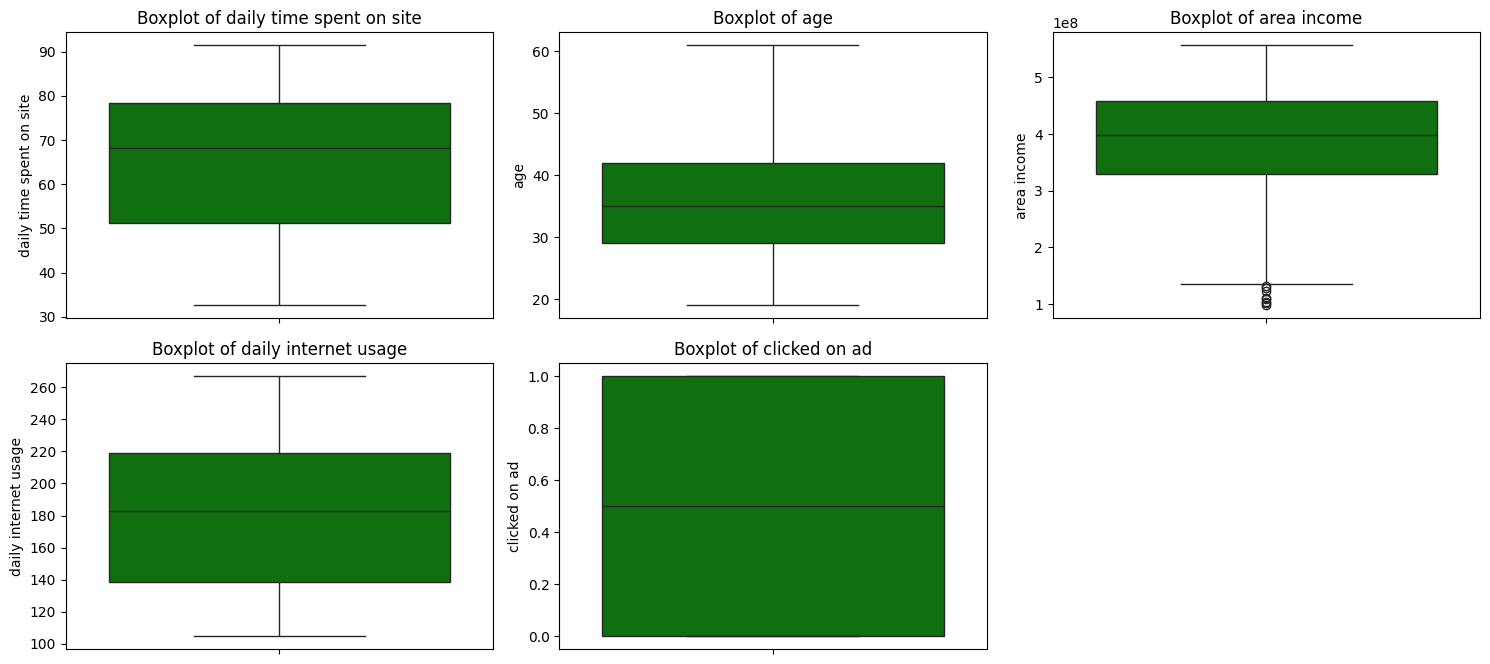

In [39]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical, 1):
    plt.subplot(3, 3, i)  # Create a mxn grid for the boxplot
    sns.boxplot(y=df_eda[col], color='green')
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

Insight :

1. The boxplot for the ``income`` column indicates the presence of outliers at the lower end of the data.
2. The daily ``time spent on site, age, and daily internet usage`` columns show no outliers.

### 1.2.2 Histogram and Distribution Line of Numerical Features

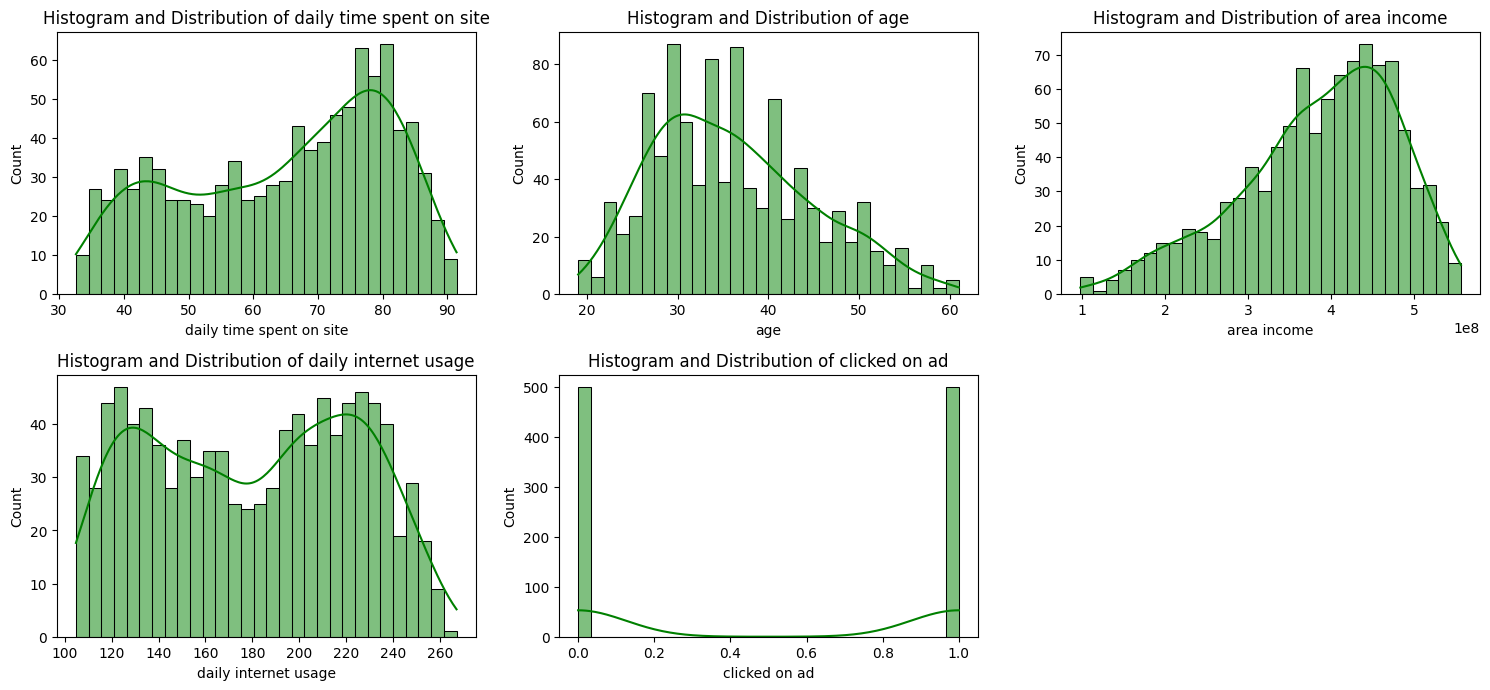

In [41]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical, 1):
    plt.subplot(3, 3, i)  # Create a mxn grid for the boxplot
    sns.histplot(df_eda[col], kde=True, bins=30, color='green')  # create histogram with distribution line
    plt.title(f'Histogram and Distribution of {col}')
    
plt.tight_layout()
plt.show()

Insight:

1. The distribution in the ``income`` column shows a negatively skewed distribution.
2. The distribution in the ``daily time spent on site, daily internet usage, and age`` columns is close to a normal distribution.

### 1.2.3 Distribution of Categorical Features

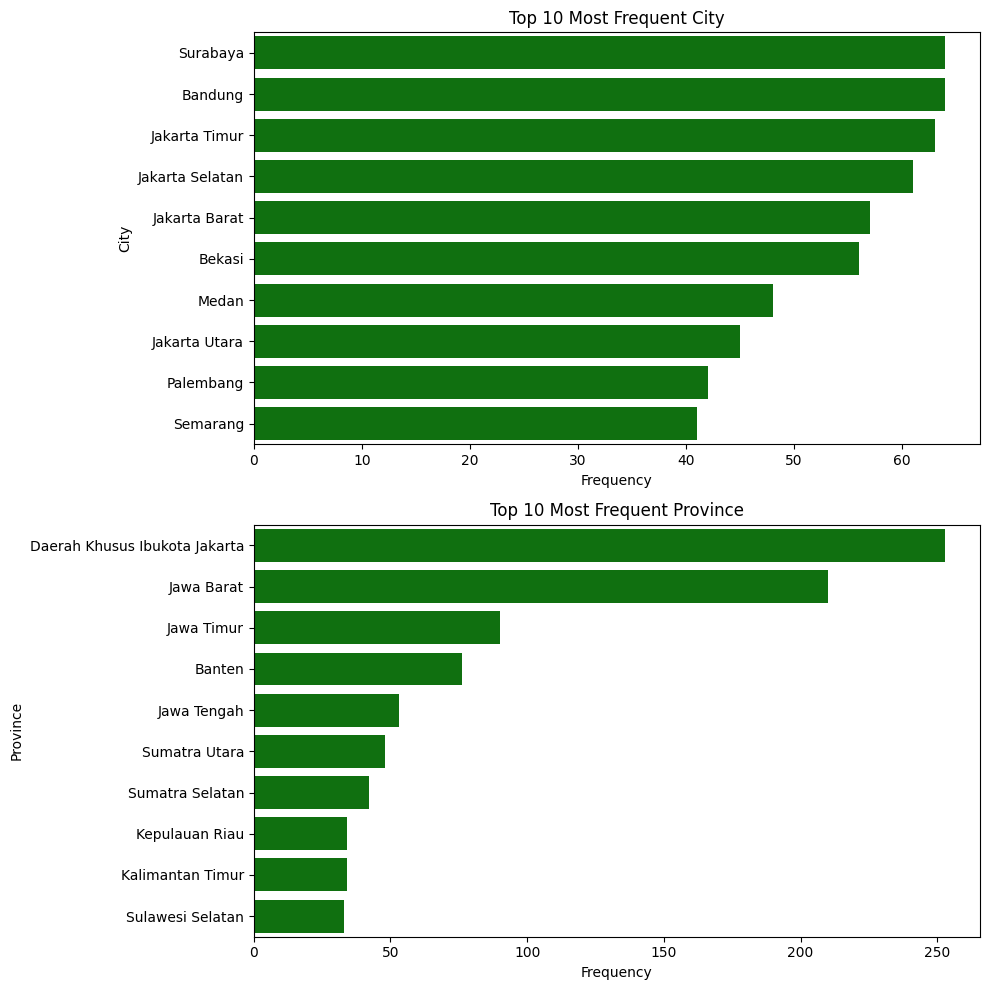

In [43]:
# Categorical columns to analyze
categorical2 = ['city', 'province']

plt.figure(figsize=(10, 10))
for i, col in enumerate(categorical2, 1):
    plt.subplot(2, 1, i)  # Create a 2x1 grid for the plots
    top_10 = df_eda[col].value_counts().nlargest(10)  # Get the top 10 categories based on frequency
    sns.barplot(y=top_10.index, x=top_10.values, orient='h', color='green')  # Use horizontal orientation
    plt.title(f'Top 10 Most Frequent {col.capitalize()}')
    plt.xlabel('Frequency')
    plt.ylabel(col.capitalize())

plt.tight_layout()
plt.show()


Insight:

1. The majority of customers are from **Surabaya and Bandung city** and **the DKI Jakarta province**.

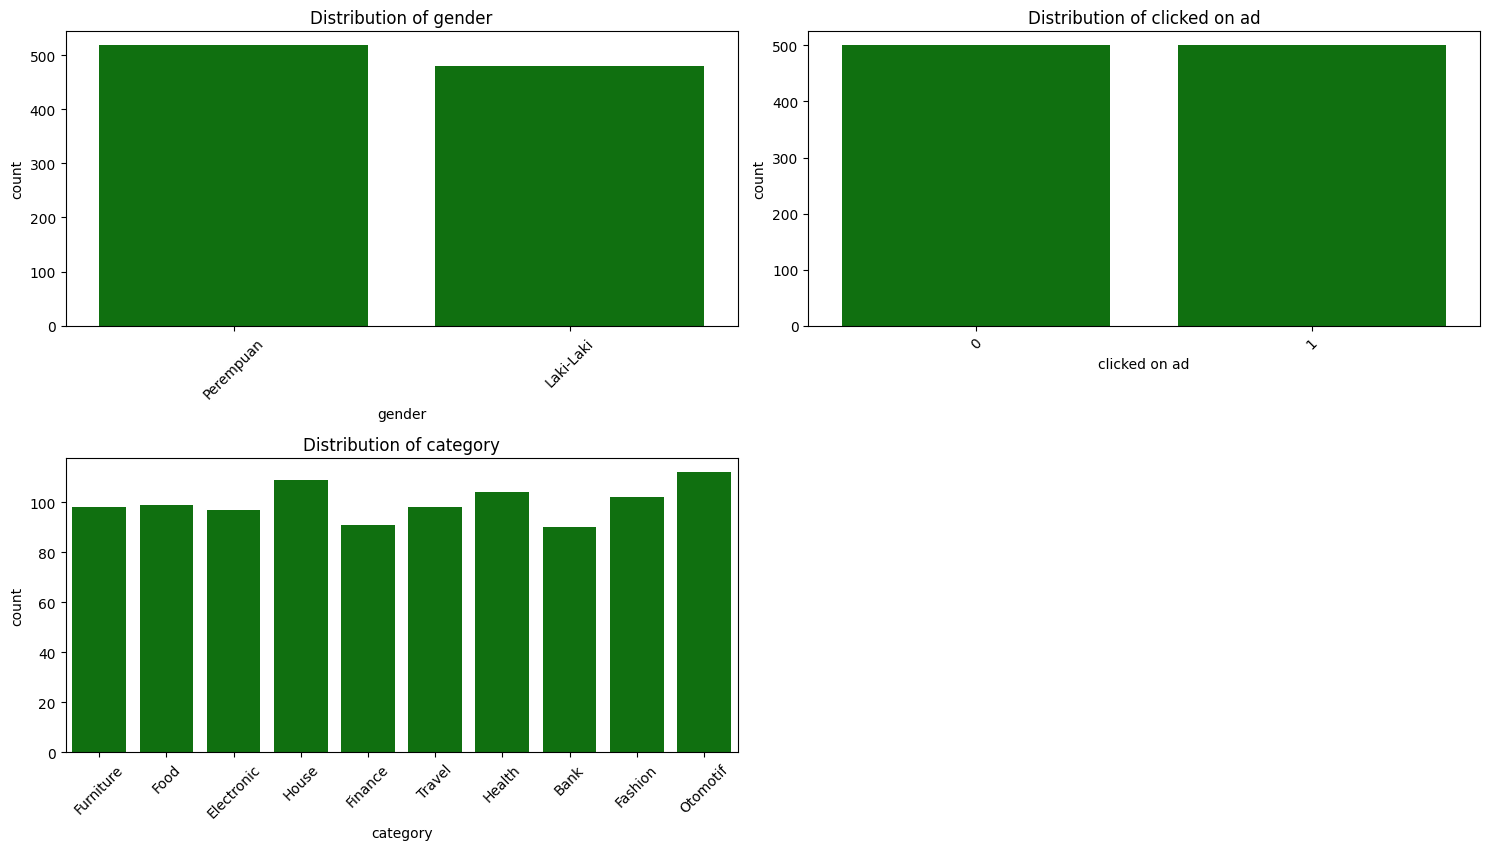

In [46]:
# Categorical columns to analyze
categorical3 = ['gender', 'clicked on ad', 'category']

plt.figure(figsize=(15, 12))
for i, col in enumerate(categorical3, 1):
    plt.subplot(3, 2, i)  # Create a 3x2 grid for the plots
    sns.countplot(x=df_eda[col], color='green')  # Create a count plot for each feature
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability if there are many categories

plt.tight_layout()
plt.show()

Insight:

1. The ``gender`` distribution of customers is dominated by females, but not significantly different from males.
2. The distribution of ``customers clicking on ads`` shows a similar number between those choosing "1" and "0," though "0" remains slightly more common.
3. The largest distribution in the ``category`` is Otomotif.

## 1.2 Bivariate Analysis

### 1.2.1 Scatter plot of Age Vs Daily Internet Usage and Daily Time Spent On Site

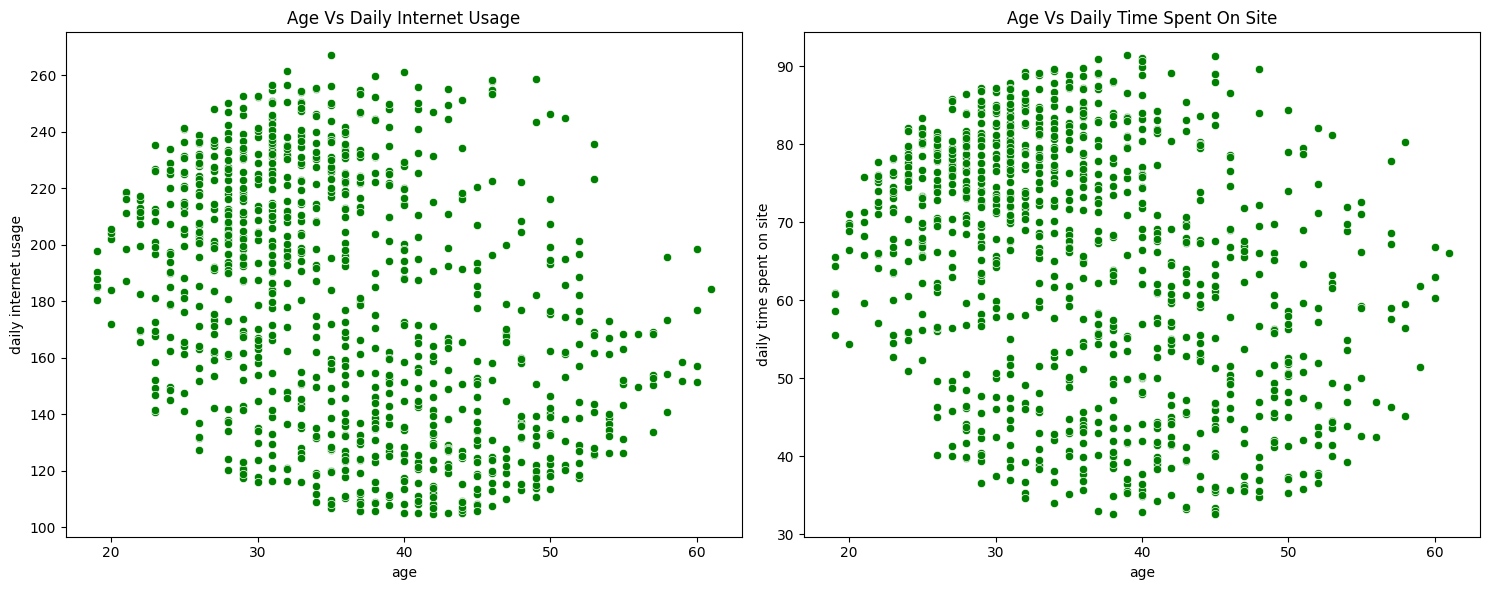

In [48]:
fig, axes = plt.subplots(1,2, figsize=(15,6))

sns.scatterplot(data=df_eda, x='age', y='daily internet usage', ax=axes[0], color='green')
axes[0].set_title('Age Vs Daily Internet Usage')

sns.scatterplot(data=df_eda, x='age', y='daily time spent on site', ax=axes[1], color='green')
axes[1].set_title('Age Vs Daily Time Spent On Site')

plt.tight_layout()
plt.show()

Insight:

There is no clear linear relationship between ``age`` and ``daily internet usage``. Similar to ``internet usage``, there is no strong relationship between ``age`` and ``time spent on the site``. These charts suggest that age does not appear to be a significant factor in determining either ``daily internet usage`` or ``daily time spent on the site``.

## 1.3 Multivariate Analysis

### 1.3.1 Heatmap Correlation

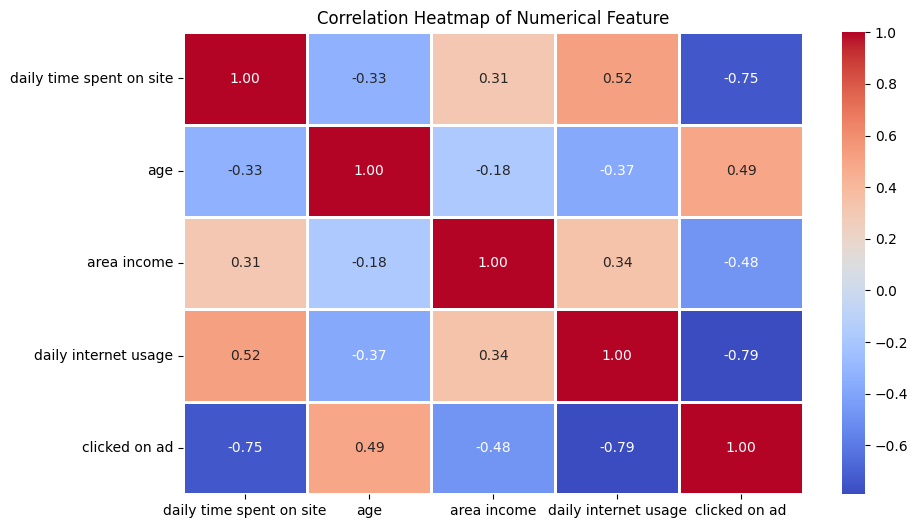

In [50]:
correlation_matrix = df_eda[numerical].corr()

plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=1)
plt.title('Correlation Heatmap of Numerical Feature')
plt.show()

Insight:

1. ``Daily time spent on site`` and ``daily internet usage`` have a moderate positive linear correlation of 0.52.
2. `Clicked on ads` has strong negative linear correlation with `daily time spent on site` and `daily internet usage` of -0.75 and -0.79.
3. The relationships between features other than in point 1 and 2 dont have a strong linear correlation.

# 2. Data Preprocessing

In [37]:
# use df_model for data preprocessing
df_model = df.copy()

In [39]:
df_model.head(3)

,daily time spent on site,age,area income,daily internet usage,gender,date,clicked on ad,city,province,category
0,68.95,35,432837300.0,256.09,Perempuan,2016-03-27 00:53:00,0,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,80.23,31,479092950.0,193.77,Laki-Laki,2016-04-04 01:39:00,0,Denpasar,Bali,Food
2,69.47,26,418501580.0,236.50,Perempuan,2016-03-13 20:35:00,0,Surabaya,Jawa Timur,Electronic


## 2.1 Feature Extraction

In [41]:
# extract year, month, and day from 'date' columns
df_model['month'] = df_model['date'].dt.month
df_model['day'] = df_model['date'].dt.day
df_model['year'] = df_model['date'].dt.year

# extract day_name and is_weeekend from date columns
df_model['day_name'] = df_model['date'].dt.day_name()
df_model['is_weekend'] = df_model['date'].dt.weekday.isin([5, 6])

# Ekstrak hour feature
df_model['hour'] = df_model['date'].dt.hour

# Function to determine time(morning, day, afternoon, and night)
def get_time_of_day(hour):
    if 5 <= hour < 12:
        return 'pagi'
    elif 12 <= hour < 17:
        return 'siang'
    elif 17 <= hour < 21:
        return 'sore'
    else:
        return 'malam'

# Extract Time Feature
df_model['time_of_day'] = df_model['hour'].apply(get_time_of_day)

In [43]:
# summarical statistic of year,month,and day
df_model[['month','day','year','hour']].describe().T

,count,mean,std,min,25%,50%,75%,max
month,1000.0,3.817,1.926973,1.0,2.0,4.0,5.0,7.0
day,1000.0,15.484,8.734073,1.0,8.0,15.0,23.0,31.0
year,1000.0,2016.000,0.000000,2016.0,2016.0,2016.0,2016.0,2016.0
hour,1000.0,11.660,6.960952,0.0,6.0,12.0,18.0,23.0


Since the ``year`` column only contains one value, which is 2016, the ``year`` column will be deleted.

In [45]:
# summarical statitics of day_name and is_weekend columns
df_model[['day_name','is_weekend','time_of_day']].describe().T

,count,unique,top,freq
day_name,1000,7,Sunday,159
is_weekend,1000,2,False,715
time_of_day,1000,4,malam,332


In [49]:
# delete 'date' and 'year' columns
df_model.drop(['date','year'],axis=1, inplace=True)

In [51]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   daily time spent on site  987 non-null    float64
 1   age                       1000 non-null   int64  
 2   area income               987 non-null    float64
 3   daily internet usage      989 non-null    float64
 4   gender                    997 non-null    object 
 5   clicked on ad             1000 non-null   int64  
 6   city                      1000 non-null   object 
 7   province                  1000 non-null   object 
 8   category                  1000 non-null   object 
 9   month                     1000 non-null   int32  
 10  day                       1000 non-null   int32  
 11  day_name                  1000 non-null   object 
 12  is_weekend                1000 non-null   bool   
 13  hour                      1000 non-null   int32  
 14  time_of_d

In [53]:
df_model.head()

,daily time spent on site,age,area income,daily internet usage,gender,clicked on ad,city,province,category,month,day,day_name,is_weekend,hour,time_of_day
0,68.95,35,432837300.0,256.09,Perempuan,0,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture,3,27,Sunday,True,0,malam
1,80.23,31,479092950.0,193.77,Laki-Laki,0,Denpasar,Bali,Food,4,4,Monday,False,1,malam
2,69.47,26,418501580.0,236.50,Perempuan,0,Surabaya,Jawa Timur,Electronic,3,13,Sunday,True,20,sore
3,74.15,29,383643260.0,245.89,Laki-Laki,0,Batam,Kepulauan Riau,House,1,10,Sunday,True,2,malam
4,68.37,35,517229930.0,225.58,Perempuan,0,Medan,Sumatra Utara,Finance,6,3,Friday,False,3,malam


## 2.2 Handle Missing Values

In [55]:
# check missing and percentage missing values
print(df_model.isnull().sum())

missing_data = df_model.isnull().sum().sum()

count_row_data = len(df_model)

missing_percentage = (missing_data/count_row_data)*100

print('Missing Rows : ',missing_data)
print('Missing Rows Percentage : ',missing_percentage,'%')

daily time spent on site    13
age                          0
area income                 13
daily internet usage        11
gender                       3
clicked on ad                0
city                         0
province                     0
category                     0
month                        0
day                          0
day_name                     0
is_weekend                   0
hour                         0
time_of_day                  0
dtype: int64
Missing Rows :  40
Missing Rows Percentage :  4.0 %


In [57]:
# delete missing rows
df_model.dropna(inplace=True)

In [59]:
# check missing values
df_model.isnull().sum().sum()

0

## 2.3 Handle Duplicated Values

In [76]:
duplicated_data = df_model.duplicated().any()

if duplicated_data == True:
    print('Data has duplicated rows')
else:
    print('Data has not duplicated rows')

Data has not duplicated rows


## 2.4 Handle Outlier

In [61]:
# Select only numerical columns
numerical_cols = df_model.select_dtypes(include=['float64', 'int64', 'int32']).columns

# Determine the lower and upper bounds to detect outliers
Q1 = df_model[numerical_cols].quantile(0.25)
Q3 = df_model[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Mark rows that are outliers (True for outliers)
outliers = ((df_model[numerical_cols] < (Q1 - 1.5 * IQR)) | (df_model[numerical_cols] > (Q3 + 1.5 * IQR)))

# Check the number of outliers per column
print(outliers.sum())

# Calculate the number of rows that have outliers in any column
outlier_rows = outliers.any(axis=1).sum()

# Calculate the percentage of outliers
outlier_percentage = (outlier_rows / len(df_model)) * 100
print('')
print(f"Outlier Percentage: {outlier_percentage:.2f}%")

daily time spent on site    0
age                         0
area income                 8
daily internet usage        0
clicked on ad               0
month                       0
day                         0
hour                        0
dtype: int64

Outlier Percentage: 0.83%


we decide to not remove outlier, because only 0.83% from data.

## 2.5 Feature Encoding

### 2.5.1 Label Encoding

In [63]:
df_model.head()

,daily time spent on site,age,area income,daily internet usage,gender,clicked on ad,city,province,category,month,day,day_name,is_weekend,hour,time_of_day
0,68.95,35,432837300.0,256.09,Perempuan,0,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture,3,27,Sunday,True,0,malam
1,80.23,31,479092950.0,193.77,Laki-Laki,0,Denpasar,Bali,Food,4,4,Monday,False,1,malam
2,69.47,26,418501580.0,236.50,Perempuan,0,Surabaya,Jawa Timur,Electronic,3,13,Sunday,True,20,sore
3,74.15,29,383643260.0,245.89,Laki-Laki,0,Batam,Kepulauan Riau,House,1,10,Sunday,True,2,malam
4,68.37,35,517229930.0,225.58,Perempuan,0,Medan,Sumatra Utara,Finance,6,3,Friday,False,3,malam


To reduce curse of dimentionality, we decided to remove `city` columns.

In [65]:
# drop city columns
df_model = df_model.drop(['city'],axis=1)

In [67]:
# use label encoding for is_weekend
is_weekend_mapping = {True: 1,
                      False: 0
    
}
df_model['is_weekend'] = df_model['is_weekend'].map(is_weekend_mapping)

In [69]:
df_model.head()

,daily time spent on site,age,area income,daily internet usage,gender,clicked on ad,province,category,month,day,day_name,is_weekend,hour,time_of_day
0,68.95,35,432837300.0,256.09,Perempuan,0,Daerah Khusus Ibukota Jakarta,Furniture,3,27,Sunday,1,0,malam
1,80.23,31,479092950.0,193.77,Laki-Laki,0,Bali,Food,4,4,Monday,0,1,malam
2,69.47,26,418501580.0,236.50,Perempuan,0,Jawa Timur,Electronic,3,13,Sunday,1,20,sore
3,74.15,29,383643260.0,245.89,Laki-Laki,0,Kepulauan Riau,House,1,10,Sunday,1,2,malam
4,68.37,35,517229930.0,225.58,Perempuan,0,Sumatra Utara,Finance,6,3,Friday,0,3,malam


### 2.5.2 One Hot Encoding

In [71]:
# applying one hot encoding on category,city,and province columns
df_model = pd.get_dummies(df_model, columns=['category'], prefix='category')
df_model = pd.get_dummies(df_model, columns=['province'], prefix='province')
df_model = pd.get_dummies(df_model, columns=['gender'], prefix='gender')
df_model = pd.get_dummies(df_model, columns=['day_name'], prefix='day_name')
df_model = pd.get_dummies(df_model, columns=['time_of_day'], prefix='time_of_day')

# 
df_model[df_model.columns[df_model.columns.str.startswith('category')]] = df_model[df_model.columns[df_model.columns.str.startswith('category')]].astype(int)
df_model[df_model.columns[df_model.columns.str.startswith('province')]] = df_model[df_model.columns[df_model.columns.str.startswith('province')]].astype(int)
df_model[df_model.columns[df_model.columns.str.startswith('gender')]] = df_model[df_model.columns[df_model.columns.str.startswith('gender')]].astype(int)
df_model[df_model.columns[df_model.columns.str.startswith('day_name')]] = df_model[df_model.columns[df_model.columns.str.startswith('day_name')]].astype(int)
df_model[df_model.columns[df_model.columns.str.startswith('time_of_day')]] = df_model[df_model.columns[df_model.columns.str.startswith('time_of_day')]].astype(int)

In [73]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 963 entries, 0 to 999
Data columns (total 48 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   daily time spent on site                963 non-null    float64
 1   age                                     963 non-null    int64  
 2   area income                             963 non-null    float64
 3   daily internet usage                    963 non-null    float64
 4   clicked on ad                           963 non-null    int64  
 5   month                                   963 non-null    int32  
 6   day                                     963 non-null    int32  
 7   is_weekend                              963 non-null    int64  
 8   hour                                    963 non-null    int32  
 9   category_Bank                           963 non-null    int32  
 10  category_Electronic                     963 non-null    int32  
 11

In [75]:
df_model.head()

,daily time spent on site,age,area income,daily internet usage,clicked on ad,month,day,is_weekend,hour,category_Bank,category_Electronic,category_Fashion,category_Finance,category_Food,category_Furniture,category_Health,category_House,category_Otomotif,category_Travel,province_Bali,province_Banten,province_Daerah Khusus Ibukota Jakarta,province_Jawa Barat,province_Jawa Tengah,province_Jawa Timur,province_Kalimantan Barat,province_Kalimantan Selatan,province_Kalimantan Timur,province_Kepulauan Riau,province_Lampung,province_Riau,province_Sulawesi Selatan,province_Sumatra Barat,province_Sumatra Selatan,province_Sumatra Utara,gender_Laki-Laki,gender_Perempuan,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday,time_of_day_malam,time_of_day_pagi,time_of_day_siang,time_of_day_sore
0,68.95,35,432837300.0,256.09,0,3,27,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
1,80.23,31,479092950.0,193.77,0,4,4,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0
2,69.47,26,418501580.0,236.50,0,3,13,1,20,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
3,74.15,29,383643260.0,245.89,0,1,10,1,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
4,68.37,35,517229930.0,225.58,0,6,3,0,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0


# 3. Modeling

## 3.1 Train and Test Split

In [77]:
# define features and target
X = df_model.drop(columns=['clicked on ad'])  
y = df_model['clicked on ad']                

In [79]:
X.head()

,daily time spent on site,age,area income,daily internet usage,month,day,is_weekend,hour,category_Bank,category_Electronic,category_Fashion,category_Finance,category_Food,category_Furniture,category_Health,category_House,category_Otomotif,category_Travel,province_Bali,province_Banten,province_Daerah Khusus Ibukota Jakarta,province_Jawa Barat,province_Jawa Tengah,province_Jawa Timur,province_Kalimantan Barat,province_Kalimantan Selatan,province_Kalimantan Timur,province_Kepulauan Riau,province_Lampung,province_Riau,province_Sulawesi Selatan,province_Sumatra Barat,province_Sumatra Selatan,province_Sumatra Utara,gender_Laki-Laki,gender_Perempuan,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday,time_of_day_malam,time_of_day_pagi,time_of_day_siang,time_of_day_sore
0,68.95,35,432837300.0,256.09,3,27,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
1,80.23,31,479092950.0,193.77,4,4,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0
2,69.47,26,418501580.0,236.50,3,13,1,20,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
3,74.15,29,383643260.0,245.89,1,10,1,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
4,68.37,35,517229930.0,225.58,6,3,0,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0


In [81]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: clicked on ad, dtype: int64

In [83]:
# split data into train and test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(770, 47)
(193, 47)
(770,)
(193,)


## 3.2 Without Normalization

In [87]:
# List of classifiers
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "SVM": SVC(probability=True)
}

# Function to evaluate models
def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    results = {}
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predictions and probabilities
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    y_train_proba = model.predict_proba(X_train)[:, 1]
    y_test_proba = model.predict_proba(X_test)[:, 1]

    # Metrics for train
    results['train_accuracy'] = accuracy_score(y_train, y_train_pred)
    results['train_roc_auc'] = roc_auc_score(y_train, y_train_proba)

    # Metrics for test
    results['test_accuracy'] = accuracy_score(y_test, y_test_pred)
    results['test_roc_auc'] = roc_auc_score(y_test, y_test_proba)

    return name, results

# Evaluate all models
model_results = {}
for name, model in models.items():
    name, results = evaluate_model(name, model, X_train, X_test, y_train, y_test)
    model_results[name] = results

### 3.2.1 Model Evaluation

In [89]:
# Display results
df_results = pd.DataFrame(model_results).T
display(df_results)

,train_accuracy,train_roc_auc,test_accuracy,test_roc_auc
Logistic Regression,0.722078,0.763925,0.782383,0.836557
Decision Tree,1.000000,1.000000,0.953368,0.953202
Random Forest,1.000000,1.000000,0.968912,0.998119
Gradient Boosting,1.000000,1.000000,0.974093,0.997528
AdaBoost,0.984416,0.999366,0.968912,0.995702
XGBoost,1.000000,1.000000,0.974093,0.996132
SVM,0.715584,0.772496,0.689119,0.754137


## 3.3 With Normalization


### 3.3.1 Minmax Scaler

In [91]:
# Inisialisasi scaler
scaler = MinMaxScaler()

# Fitting dan transformasi data training
X_train_scaled = scaler.fit_transform(X_train)

# Hanya transformasi data test (gunakan scaler yang sudah di-fit pada data train)
X_test_scaled = scaler.transform(X_test)

In [93]:
# List of classifiers
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "SVM": SVC(probability=True)
}

# Function to evaluate models
def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    results = {}
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predictions and probabilities
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    y_train_proba = model.predict_proba(X_train)[:, 1] if hasattr(model, "predict_proba") else None
    y_test_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Metrics for train
    results['train_accuracy'] = accuracy_score(y_train, y_train_pred)
    results['train_roc_auc'] = roc_auc_score(y_train, y_train_proba) if y_train_proba is not None else None

    # Metrics for test
    results['test_accuracy'] = accuracy_score(y_test, y_test_pred)
    results['test_roc_auc'] = roc_auc_score(y_test, y_test_proba) if y_test_proba is not None else None

    return name, results

# Evaluate all models
model_results = {}
for name, model in models.items():
    name, results = evaluate_model(name, model, X_train_scaled, X_test_scaled, y_train, y_test)
    model_results[name] = results

### 3.3.2  Model Evaluation

In [95]:
# Display results
df_results_scaled = pd.DataFrame(model_results).T
display(df_results_scaled)

,train_accuracy,train_roc_auc,test_accuracy,test_roc_auc
Logistic Regression,0.968831,0.993921,0.968912,0.998388
Decision Tree,1.000000,1.000000,0.948187,0.947883
Random Forest,1.000000,1.000000,0.974093,0.998066
Gradient Boosting,1.000000,1.000000,0.963731,0.996561
AdaBoost,0.984416,0.999366,0.968912,0.995702
XGBoost,1.000000,1.000000,0.974093,0.996132
SVM,0.981818,0.998846,0.968912,0.996561


### 3.3.3 Confusion Matrix and Feature Importance of Adaboost Model

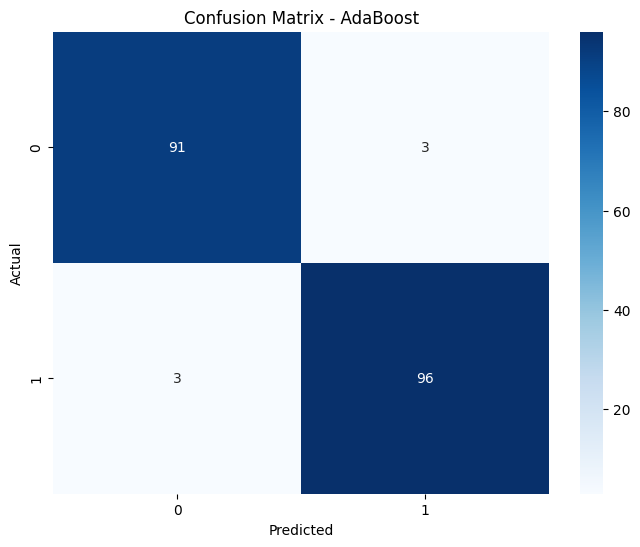

Feature Importance (AdaBoost):
                                   Feature  Importance
3                     daily internet usage        0.22
2                              area income        0.14
1                                      age        0.14
5                                      day        0.14
0                 daily time spent on site        0.10
8                            category_Bank        0.04
42                      day_name_Wednesday        0.04
9                      category_Electronic        0.02
11                        category_Finance        0.02
41                        day_name_Tuesday        0.02
13                      category_Furniture        0.02
15                          category_House        0.02
16                       category_Otomotif        0.02
18                           province_Bali        0.02
38                       day_name_Saturday        0.02
22                    province_Jawa Tengah        0.02
34                        gender_L

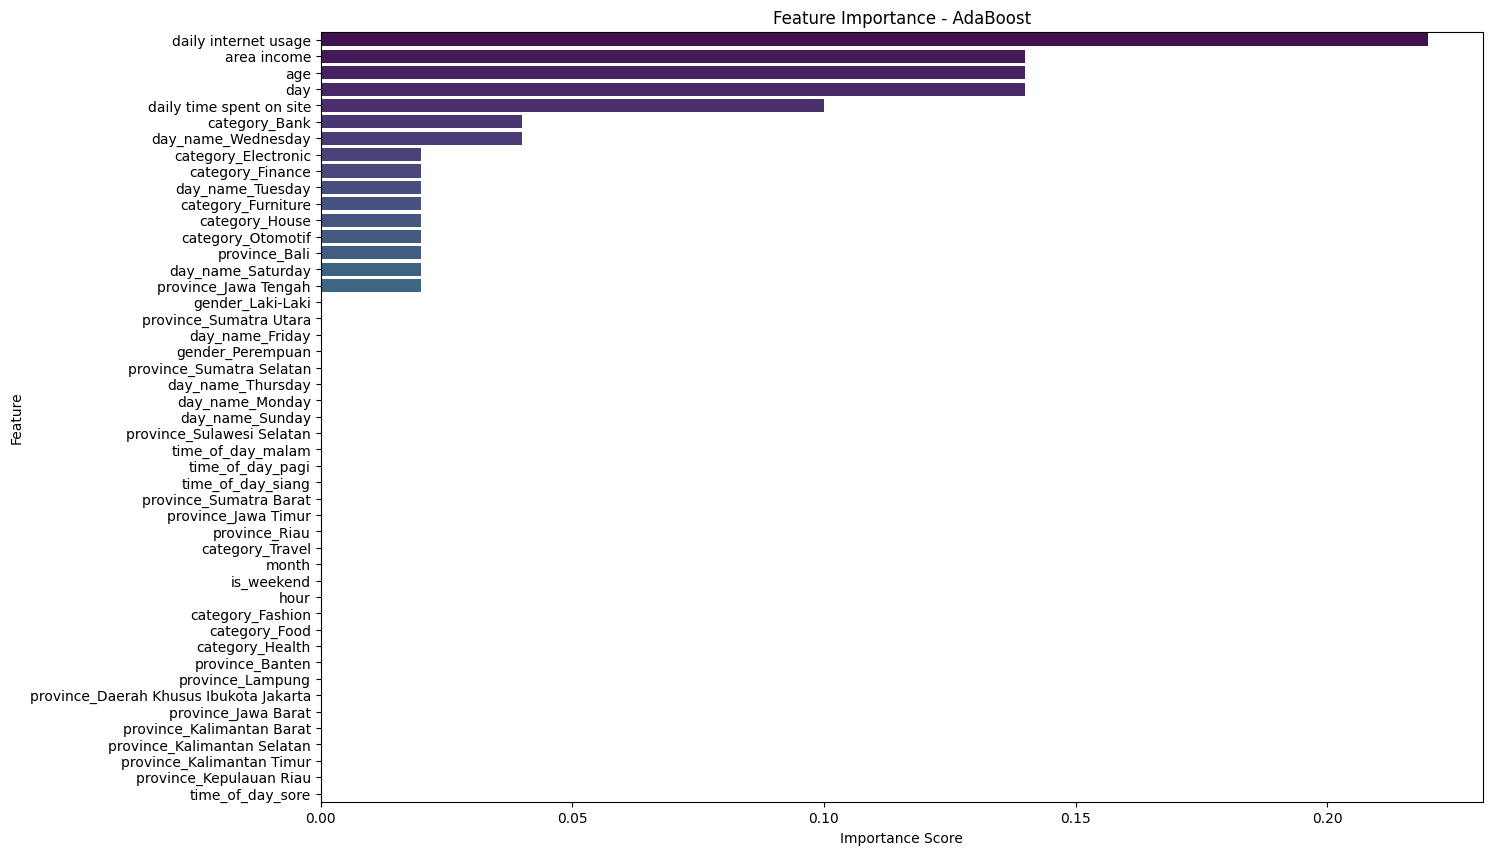

In [97]:
# Initiate Adaboost Model
adaboost_model = AdaBoostClassifier()

# Fit AdaBoost on scaled data
adaboost_model.fit(X_train, y_train)

# Predict on testing data
y_test_pred = adaboost_model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix - AdaBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature Importance
feature_importances = adaboost_model.feature_importances_
feature_names = X_train.columns if hasattr(X_train, 'columns') else [f"Feature {i}" for i in range(X_train.shape[1])]

# Create dataframe for feature importance
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print Feature Importance
print("Feature Importance (AdaBoost):")
print(importance_df)

# Plot Feature Importance
plt.figure(figsize=(15, 10))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance - AdaBoost')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

Insight from Adaboost's Feature Importance :


1. The daily internet usage feature has a coefficient of 0.2 for customers clicking on ads.
2. The income, age, and day features have a coefficient of 0.18 for customers clicking on ads.
3. The daily time spent on site feature has a coefficient of 0.10 for customers clicking on ads.
4. The category_bank feature and Wednesday have a coefficient of 0.4 for customers clicking on ads.ncisely.

# 4. Business Recommendation

In [103]:
# extract year, month, and day from 'date' columns
df_eda['month'] = df_eda['date'].dt.month
df_eda['day'] = df_eda['date'].dt.day
df_eda['year'] = df_eda['date'].dt.year

# extract day_name and is_weeekend from date columns
df_eda['day_name'] = df_eda['date'].dt.day_name()
df_eda['is_weekend'] = df_eda['date'].dt.weekday.isin([5, 6])

# convert is weekend columns to numeric
is_weekend_mapping = {True: 1,
                      False: 0
    
}
df_eda['is_weekend'] = df_eda['is_weekend'].map(is_weekend_mapping)

# Ekstrak hour feature
df_eda['hour'] = df_eda['date'].dt.hour

# Function to determine time(morning, day, afternoon, and night)
def get_time_of_day(hour):
    if 5 <= hour < 12:
        return 'pagi'
    elif 12 <= hour < 17:
        return 'siang'
    elif 17 <= hour < 21:
        return 'sore'
    else:
        return 'malam'

# Extract Time Feature
df_eda['time_of_day'] = df_eda['hour'].apply(get_time_of_day)

In [105]:
df_eda.head(2)

,daily time spent on site,age,area income,daily internet usage,gender,date,clicked on ad,city,province,category,month,day,year,day_name,is_weekend,hour,time_of_day
0,68.95,35,432837300.0,256.09,Perempuan,2016-03-27 00:53:00,0,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture,3,27,2016,Sunday,1,0,malam
1,80.23,31,479092950.0,193.77,Laki-Laki,2016-04-04 01:39:00,0,Denpasar,Bali,Food,4,4,2016,Monday,0,1,malam


#### 4.1 Daily Internet Usage vs Clicked on Ad

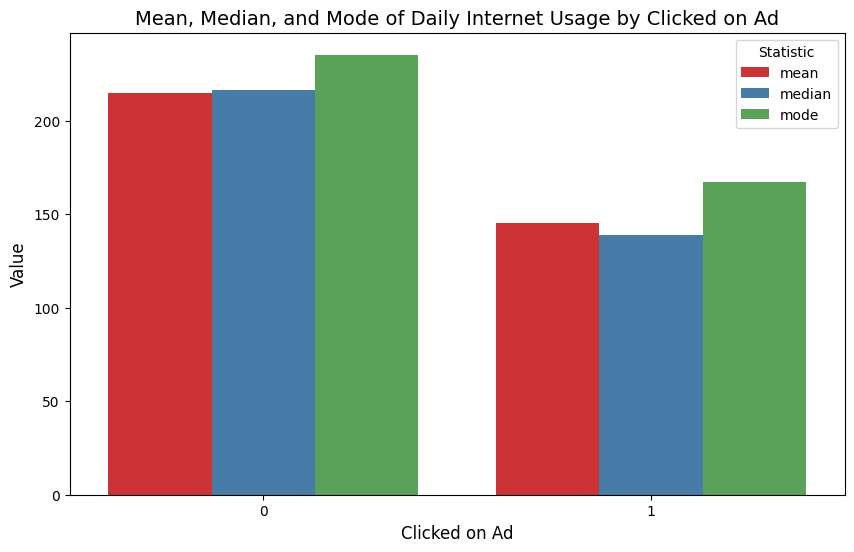

In [409]:
# Calculate mean, median, and mode of daily internet usage for each category of 'clicked_on_ad'
stats_internet_usage= df_eda.groupby('clicked on ad')['daily internet usage'].agg(
    mean='mean',
    median='median',
    mode=lambda x: mode(x) 
).reset_index()

# Tidying up data for visualization
stats_melted = stats_internet_usage.melt(id_vars='clicked on ad', var_name='Statistic', value_name='Value')

# Creating Barplot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=stats_melted, x='clicked on ad', y='Value', hue='Statistic', palette='Set1')

# Titling and Labeling
plt.title('Mean, Median, and Mode of Daily Internet Usage by Clicked on Ad', fontsize=14)
plt.xlabel('Clicked on Ad', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.legend(title='Statistic', fontsize=10)

# Show plot
plt.show()

In [388]:
stats_internet_usage

,clicked on ad,mean,median,mode
0,0,214.595233,216.50,235.28
1,1,145.342077,138.79,167.22


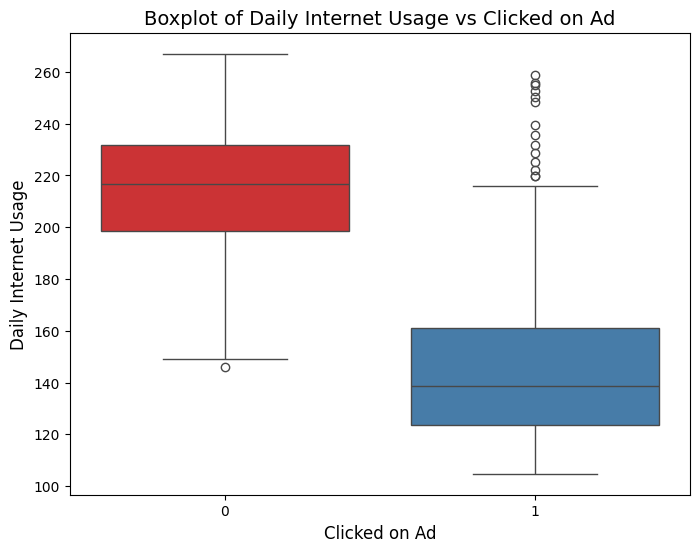

In [418]:
# Creating boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_eda, x='clicked on ad', y='daily internet usage', palette='Set1')

# titling and labeling
plt.title('Boxplot of Daily Internet Usage vs Clicked on Ad', fontsize=14)
plt.xlabel('Clicked on Ad', fontsize=12)
plt.ylabel('Daily Internet Usage', fontsize=12)

# showing plot
plt.show()

### 4.2 Area Income vs Clicked on Ad

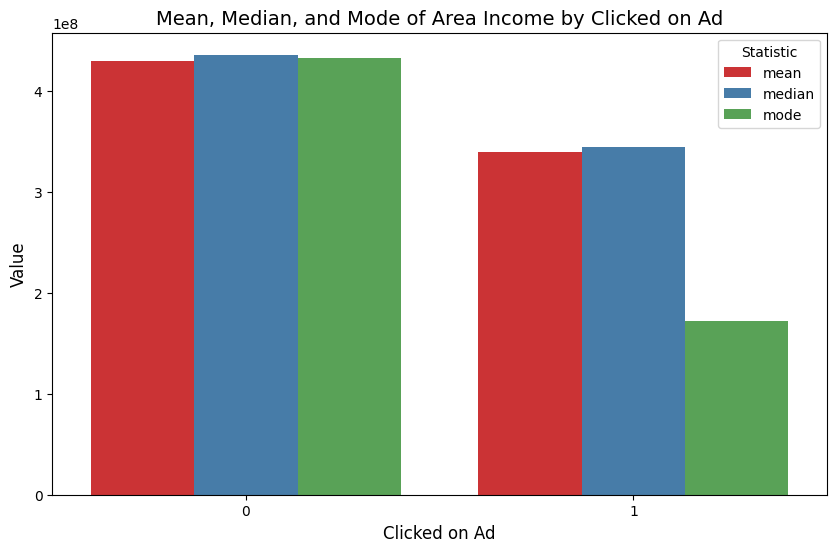

In [399]:
# Calculate mean, median, and mode of area income for each category of 'clicked_on_ad'
stats_income= df_eda.groupby('clicked on ad')['area income'].agg(
    mean='mean',
    median='median',
    mode=lambda x: mode(x) 
).reset_index()

# Tidying up data for visualization
stats_melted = stats_income.melt(id_vars='clicked on ad', var_name='Statistic', value_name='Value')

# Creating Barplot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=stats_melted, x='clicked on ad', y='Value', hue='Statistic', palette='Set1')

# Titling and Labeling
plt.title('Mean, Median, and Mode of Area Income by Clicked on Ad', fontsize=14)
plt.xlabel('Clicked on Ad', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.legend(title='Statistic', fontsize=10)

# Show plot
plt.show()

In [393]:
stats_income

,clicked on ad,mean,median,mode
0,0,4.299090e+08,436334990.0,432837300.0
1,1,3.400933e+08,344980090.0,172153310.0


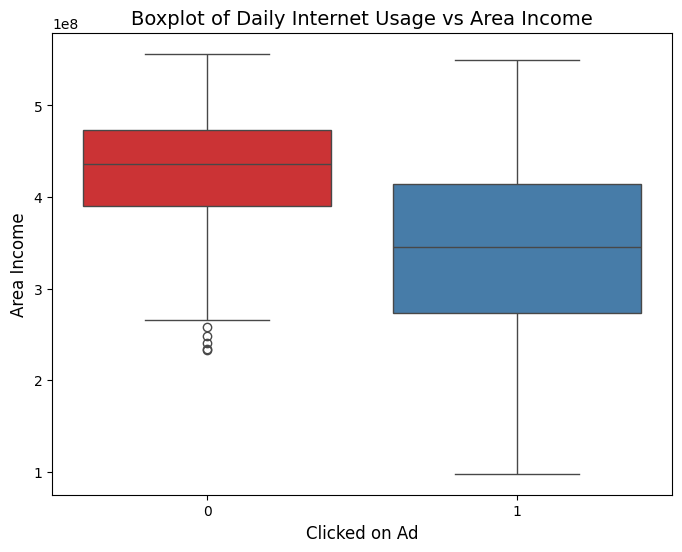

In [421]:
# Creating boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_eda, x='clicked on ad', y='area income', palette='Set1')

# titling and labeling
plt.title('Boxplot of Daily Internet Usage vs Area Income', fontsize=14)
plt.xlabel('Clicked on Ad', fontsize=12)
plt.ylabel('Area Income', fontsize=12)

# showing plot
plt.show()

### 4.3 Daily Time Spent on Site vs Clicked on Ads

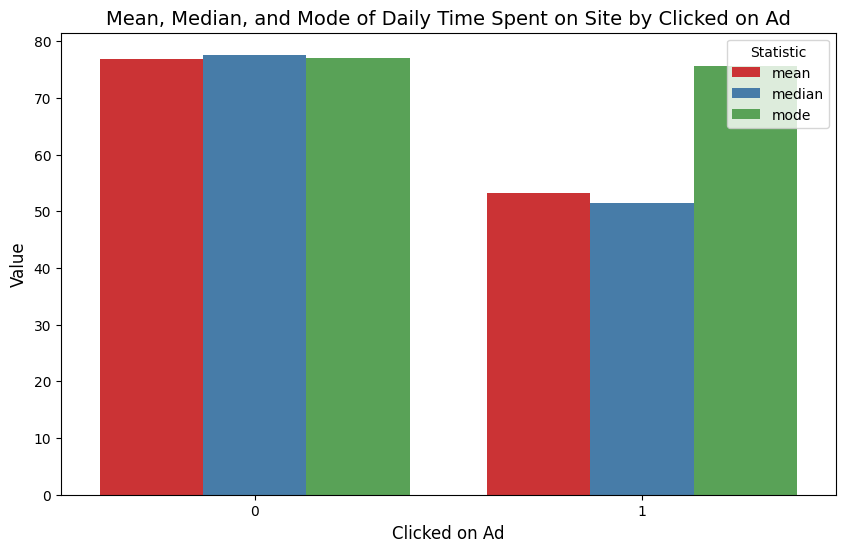

In [407]:
# Calculate mean, median, and mode of daily time spent on site for each category of 'clicked_on_ad'
stats_site= df_eda.groupby('clicked on ad')['daily time spent on site'].agg(
    mean='mean',
    median='median',
    mode=lambda x: mode(x) 
).reset_index()

# Tidying up data for visualization
stats_melted = stats_site.melt(id_vars='clicked on ad', var_name='Statistic', value_name='Value')

# Creating Barplot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=stats_melted, x='clicked on ad', y='Value', hue='Statistic', palette='Set1')

# Titling and Labeling
plt.title('Mean, Median, and Mode of Daily Time Spent on Site by Clicked on Ad', fontsize=14)
plt.xlabel('Clicked on Ad', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.legend(title='Statistic', fontsize=10)

# Show plot
plt.show()

In [411]:
stats_site

,clicked on ad,mean,median,mode
0,0,76.787805,77.615,77.05
1,1,53.143111,51.500,75.55


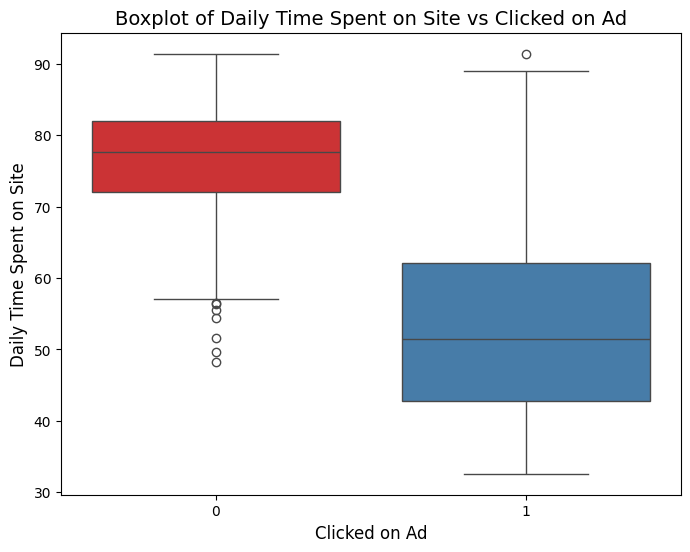

In [415]:
# Creating boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_eda, x='clicked on ad', y='daily time spent on site', palette='Set1')

# titling and labeling
plt.title('Boxplot of Daily Time Spent on Site vs Clicked on Ad', fontsize=14)
plt.xlabel('Clicked on Ad', fontsize=12)
plt.ylabel('Daily Time Spent on Site', fontsize=12)

# showing plot
plt.show()

### 4.4 Day vs Clicked on Ads

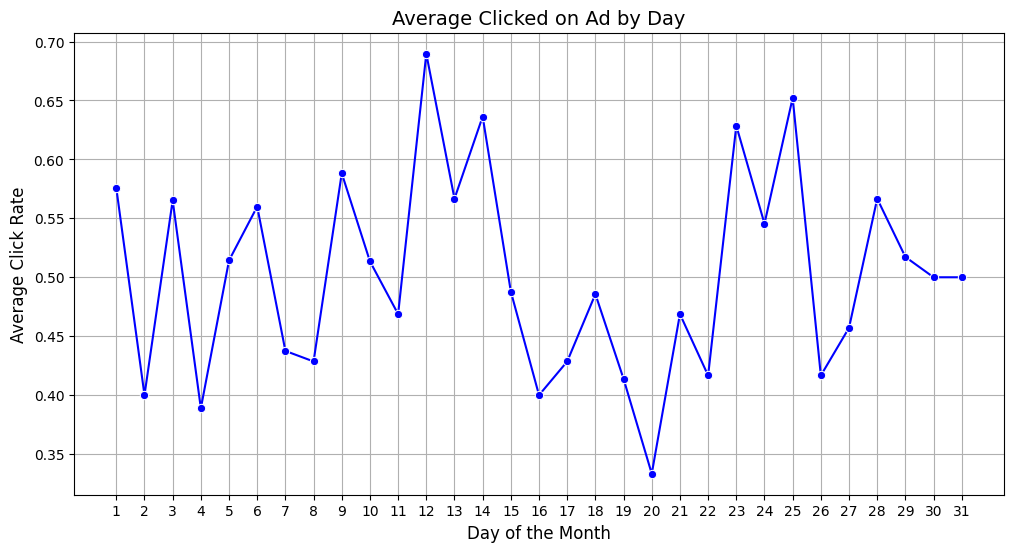

In [146]:
# calculating means of clicked on ad per day
average_clicks = df_eda.groupby('day')['clicked on ad'].mean().reset_index()

# creating lineplot
plt.figure(figsize=(12, 6))
sns.lineplot(data=average_clicks, x='day', y='clicked on ad', marker='o', color='blue')

# titling and labeling
plt.title('Average Clicked on Ad by Day', fontsize=14)
plt.xlabel('Day of the Month', fontsize=12)
plt.ylabel('Average Click Rate', fontsize=12)
plt.xticks(range(1, 32))  
plt.grid()

# showing plot
plt.show()

In [142]:
ac_day = average_clicks.sort_values(by='clicked on ad', ascending=False)

ac_day.head()

,day,clicked on ad
11,12,0.689655
24,25,0.652174
13,14,0.636364
22,23,0.628571
8,9,0.588235


### 4.5 Day Name vs Clicked on Ads

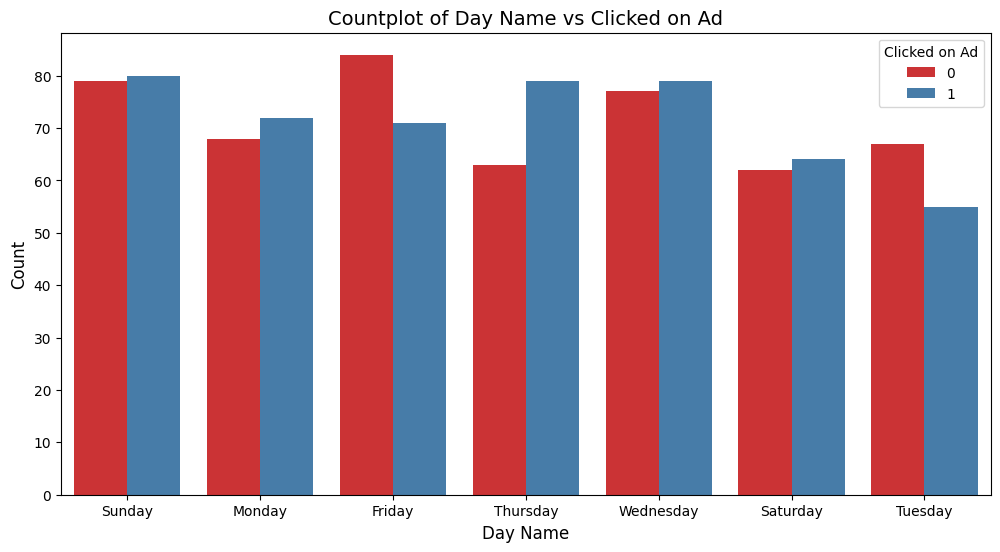

In [476]:
# Creating Countplot
plt.figure(figsize=(12, 6))
sns.countplot(data=df_eda, x='day_name', hue='clicked on ad', palette='Set1')

# Titling and Labeling
plt.title('Countplot of Day Name vs Clicked on Ad', fontsize=14)
plt.xlabel('Day Name', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Clicked on Ad', fontsize=10)

# Showing plot
plt.show()

### 4.6 Is Weekend vs Clicked on Ads

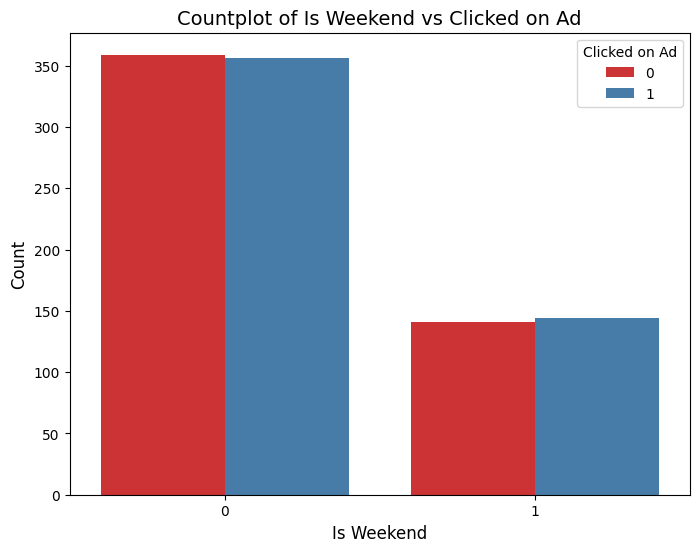

In [480]:
# Creating Countplot
plt.figure(figsize=(8, 6))
sns.countplot(data=df_eda, x='is_weekend', hue='clicked on ad', palette='Set1')

# Titling and Labeling
plt.title('Countplot of Is Weekend vs Clicked on Ad', fontsize=14)
plt.xlabel('Is Weekend', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Clicked on Ad', fontsize=10)

# Showing plot
plt.show()

### 4.7 Category vs Clicked on Ads

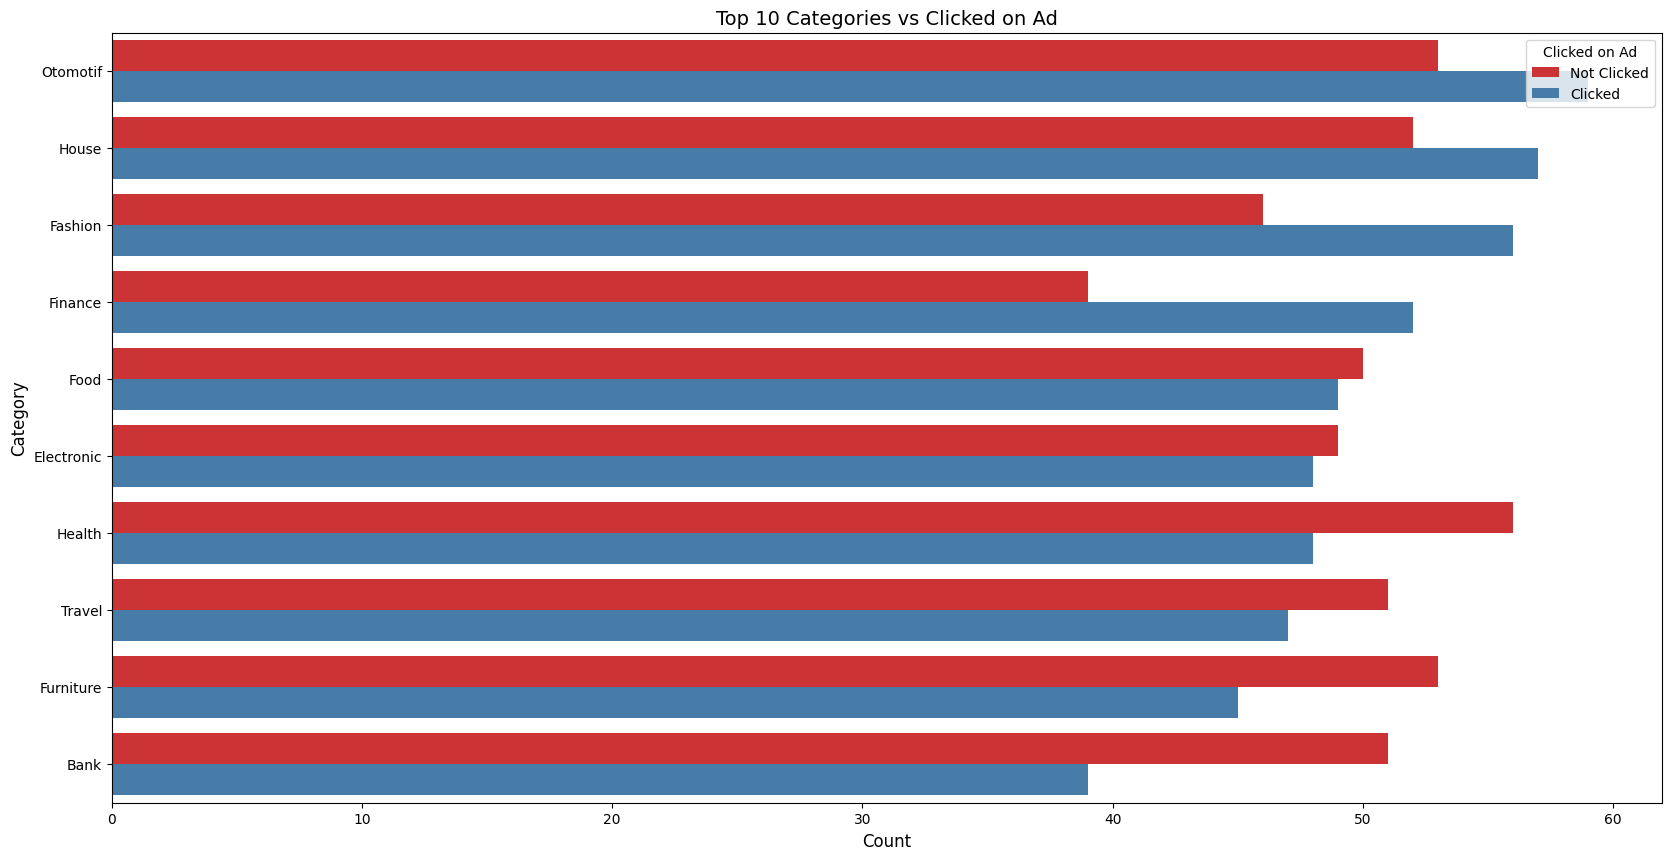

In [524]:
# Calcuting total clicked on ads per category
top_categories = (
    df_eda[df_eda['clicked on ad'] == 1]
    .groupby('category')
    .size()
    .sort_values(ascending=False)
    .head(10)
    .index
)

# filtering data only show top 10 category
filtered_df = df_eda[df_eda['category'].isin(top_categories)]

# Crearing countplot
plt.figure(figsize=(20, 10))
sns.countplot(data=filtered_df, y='category', hue='clicked on ad', palette='Set1', order=top_categories)

# titling and labeling
plt.title('Top 10 Categories vs Clicked on Ad', fontsize=14)
plt.ylabel('Category', fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.legend(title='Clicked on Ad', labels=['Not Clicked', 'Clicked'], fontsize=10, loc='upper right')

# showing plot
plt.show()

In [574]:
# Calculating probability click on ads per category
click_probabilities_category = (
    df_eda.groupby('category')['clicked on ad']
    .mean()
    .sort_values(ascending=False)  
    .head(10)  
    .reset_index()  
)

# create percentage click on ads columns
click_probabilities_category['click_probability (%)'] = click_probabilities_category['clicked on ad'] * 100

# Display result
display(click_probabilities_category)

,category,clicked on ad,click_probability (%)
0,Finance,0.571429,57.142857
1,Fashion,0.549020,54.901961
2,Otomotif,0.526786,52.678571
3,House,0.522936,52.293578
4,Food,0.494949,49.494949
5,Electronic,0.494845,49.484536
6,Travel,0.479592,47.959184
7,Health,0.461538,46.153846
8,Furniture,0.459184,45.918367
9,Bank,0.433333,43.333333


### 4.8 Province vs Clicked on Ads

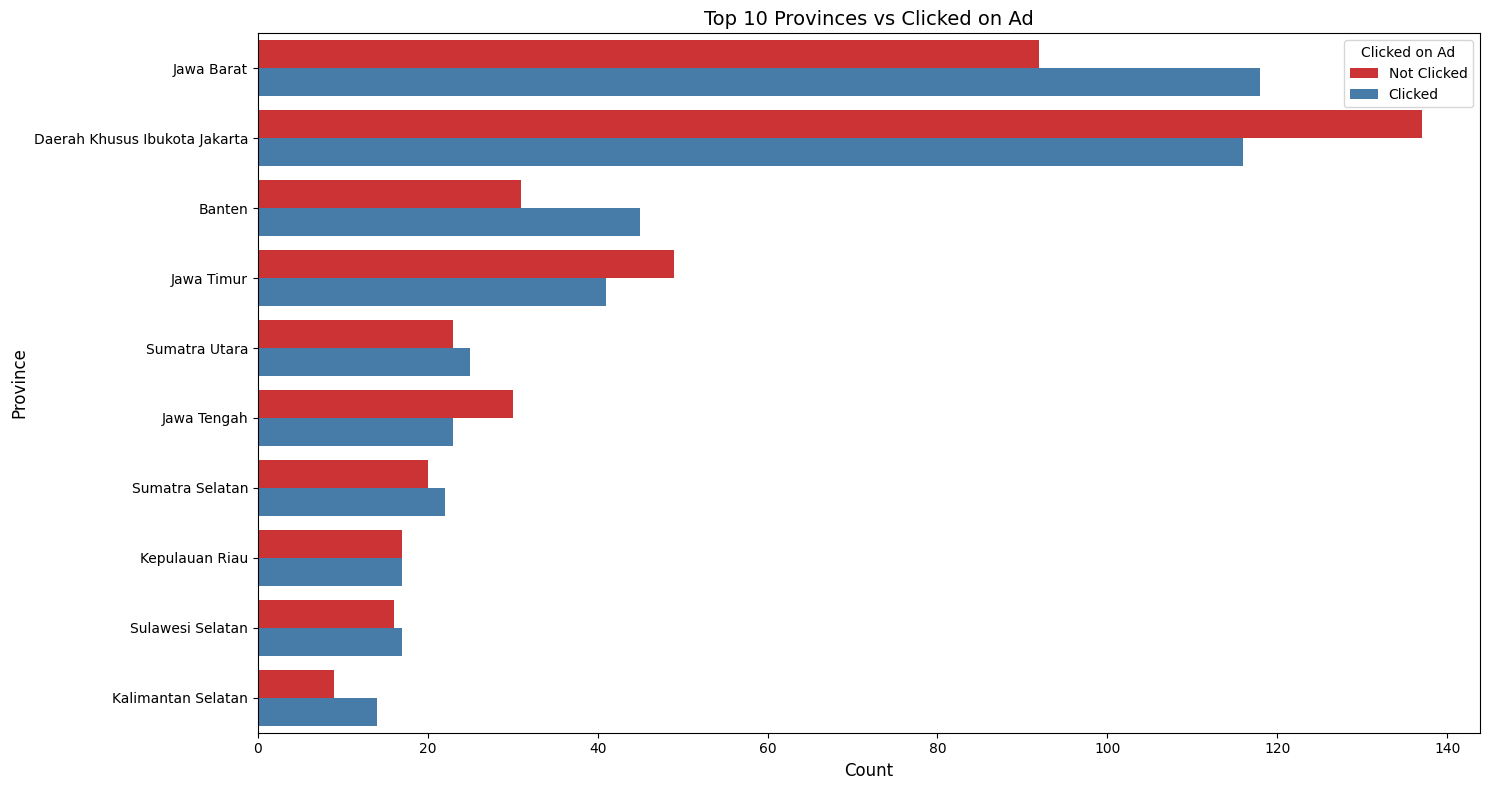

In [554]:
# Calcuting total clicked on ads per province
top_provinces = (
    df_eda[df_eda['clicked on ad'] == 1]
    .groupby('province')
    .size()
    .sort_values(ascending=False)
    .head(10)
    .index
)

# filtering data only show top 10 province
filtered_df = df_eda[df_eda['province'].isin(top_provinces)]

# Crearing countplot
plt.figure(figsize=(15, 8))
sns.countplot(data=filtered_df, y='province', hue='clicked on ad', palette='Set1', order=top_provinces)

# titling and labeling
plt.title('Top 10 Provinces vs Clicked on Ad', fontsize=14)
plt.ylabel('Province', fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.legend(title='Clicked on Ad', labels=['Not Clicked', 'Clicked'], fontsize=10, loc='upper right')

# showing plot
plt.tight_layout() 
plt.show()

In [580]:
# Calculating probability click on ads per category
click_probabilities_province = (
    df_eda.groupby('province')['clicked on ad']
    .mean()
    .sort_values(ascending=False)  
    .head(10)  
    .reset_index()  
)

# create percentage click on ads columns
click_probabilities_province['click_probability (%)'] = click_probabilities_province['clicked on ad'] * 100

# Display result
display(click_probabilities_province)

,province,clicked on ad,click_probability (%)
0,Kalimantan Selatan,0.608696,60.869565
1,Banten,0.592105,59.210526
2,Sumatra Barat,0.578947,57.894737
3,Jawa Barat,0.561905,56.190476
4,Sumatra Selatan,0.523810,52.380952
5,Riau,0.521739,52.173913
6,Sumatra Utara,0.520833,52.083333
7,Sulawesi Selatan,0.515152,51.515152
8,Kepulauan Riau,0.500000,50.000000
9,Lampung,0.482759,48.275862


### 4.9 Gender vs Clicked on Ads

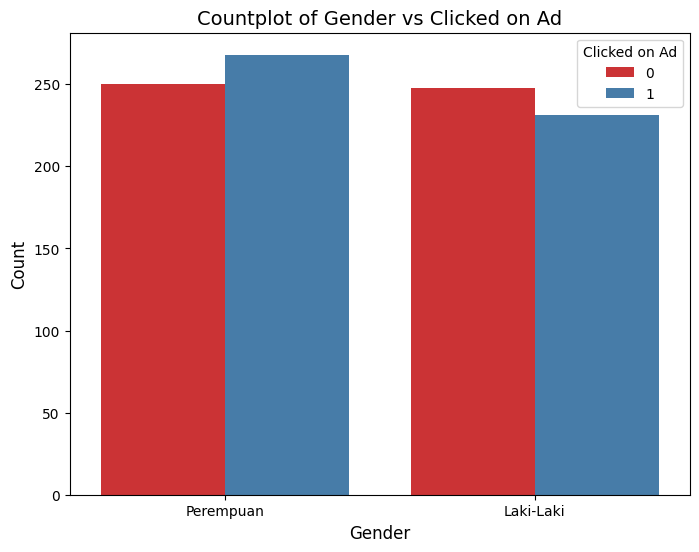

In [454]:
# Creating Countplot
plt.figure(figsize=(8, 6))
sns.countplot(data=df_eda, x='gender', hue='clicked on ad', palette='Set1')

# Titling and Labeling
plt.title('Countplot of Gender vs Clicked on Ad', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Clicked on Ad', fontsize=10)

# Showing plot
plt.show()

### 4.10 Month vs Clicked on Ad

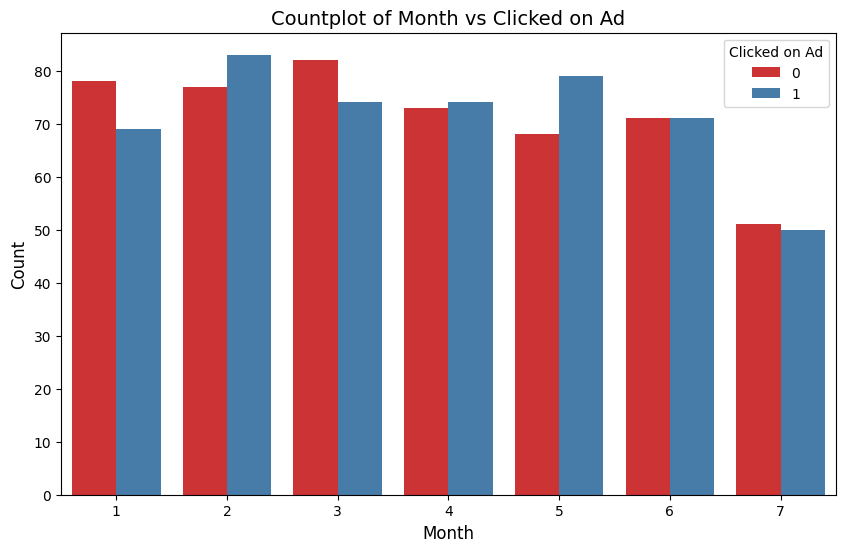

In [478]:
# Creating Countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=df_eda, x='month', hue='clicked on ad', palette='Set1')

# Titling and Labeling
plt.title('Countplot of Month vs Clicked on Ad', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Clicked on Ad', fontsize=10)

# Showing plot
plt.show()

### 4.11 Age vs Clicked on Ad

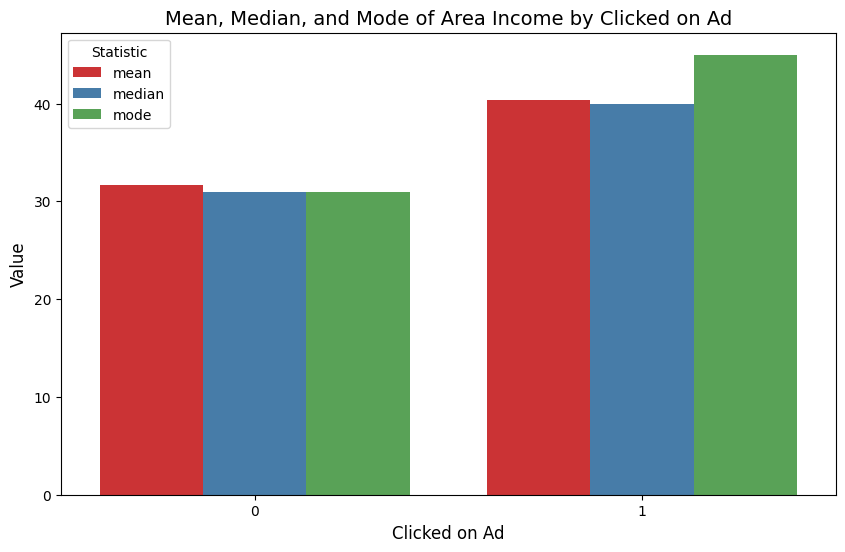

In [79]:
# Calculate mean, median, and mode of age for each category of 'clicked_on_ad'
stats_age= df_eda.groupby('clicked on ad')['age'].agg(
    mean='mean',
    median='median',
    mode=lambda x: mode(x) 
).reset_index()

# Tidying up data for visualization
stats_melted = stats_age.melt(id_vars='clicked on ad', var_name='Statistic', value_name='Value')

# Creating Barplot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=stats_melted, x='clicked on ad', y='Value', hue='Statistic', palette='Set1')

# Titling and Labeling
plt.title('Mean, Median, and Mode of Area Income by Clicked on Ad', fontsize=14)
plt.xlabel('Clicked on Ad', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.legend(title='Statistic', fontsize=10)

# Show plot
plt.show()

In [81]:
stats_age

,clicked on ad,mean,median,mode
0,0,31.684,31.0,31
1,1,40.334,40.0,45


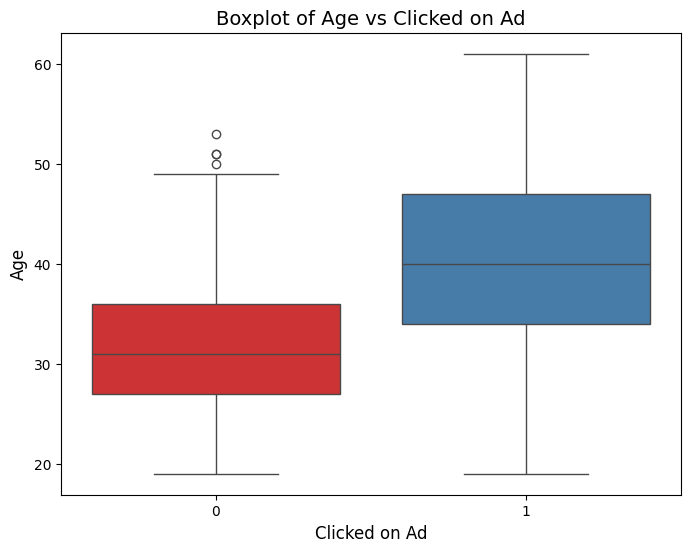

In [83]:
# Creating boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_eda, x='clicked on ad', y='age', palette='Set1')

# titling and labeling
plt.title('Boxplot of Age vs Clicked on Ad', fontsize=14)
plt.xlabel('Clicked on Ad', fontsize=12)
plt.ylabel('Age', fontsize=12)

# showing plot
plt.show()

## 4.12 Time of Days vs Clicked on Ad

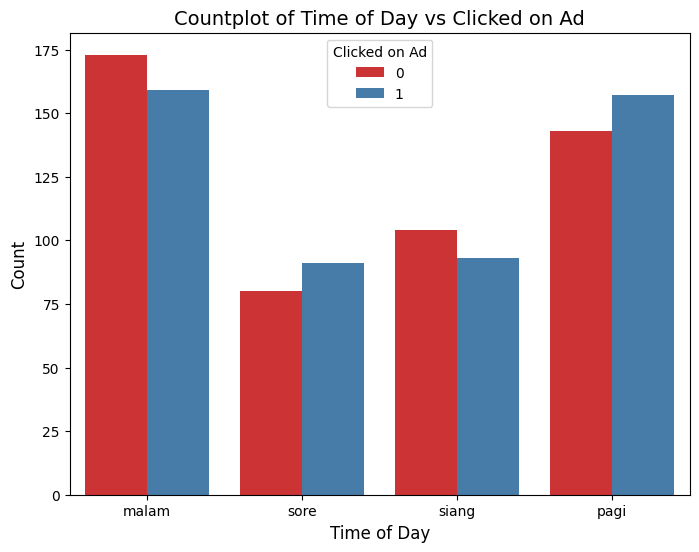

In [108]:
# Creating Countplot
plt.figure(figsize=(8, 6))
sns.countplot(data=df_eda, x='time_of_day', hue='clicked on ad', palette='Set1')

# Titling and Labeling
plt.title('Countplot of Time of Day vs Clicked on Ad', fontsize=14)
plt.xlabel('Time of Day', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Clicked on Ad', fontsize=10)

# Showing plot
plt.show()

## 4.13 Hour vs Clicked on Ad

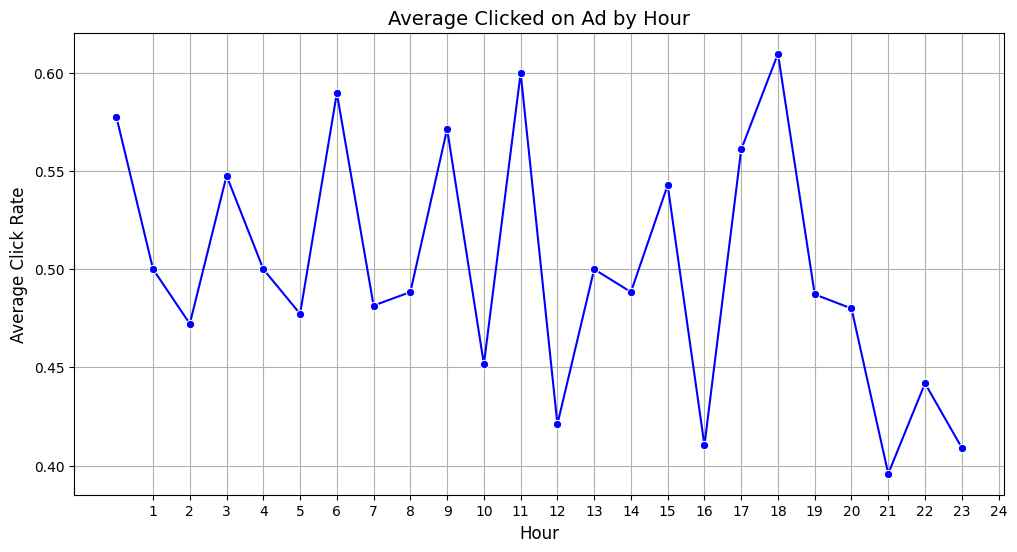

In [124]:
# calculating means of clicked on ad per day
average_clicks = df_eda.groupby('hour')['clicked on ad'].mean().reset_index()

# creating lineplot
plt.figure(figsize=(12, 6))
sns.lineplot(data=average_clicks, x='hour', y='clicked on ad', marker='o', color='blue')

# titling and labeling
plt.title('Average Clicked on Ad by Hour', fontsize=14)
plt.xlabel('Hour', fontsize=12)
plt.ylabel('Average Click Rate', fontsize=12)
plt.xticks(range(1, 25))  
plt.grid()

# showing plot
plt.show()

## 4.14 Business Recommendation

| **Business Recommendation**         | **Explanation**                                                                                       | **Action Plan**                                                                                                                                                       |
|-------------------------------------|-------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Personalized Ad Campaigns**       | The model demonstrates exceptional ability to differentiate users likely to click ads. This can be utilized to personalize ads based on audience preferences. | Display ads tailored to customers who click ads, characterized by: average age of 40, average income around 340 million, daily internet usage of 145 minutes, and daily time spent on site of 56 minutes.       |
| **Optimized Campaign Timing and Dates** | The "day" feature indicates specific time patterns that influence CTR.                                               | Schedule campaigns during high engagement periods, such as mid-month and end-of-month, as well as in the evening and morning, to increase CTR.                                                             |
